In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Load the dataset
file_path = 'Churn_Modelling.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
# Drop non-relevant columns
data_cleaned = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Encode categorical variables
label_encoder = LabelEncoder()
data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])
data_cleaned = pd.get_dummies(data_cleaned, columns=['Geography'], drop_first=True)

# Split data into features and target
X = data_cleaned.drop(columns=['Exited'])
y = data_cleaned['Exited']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.811
Confusion Matrix:
 [[1543   64]
 [ 314   79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.866
Confusion Matrix:
 [[1552   55]
 [ 213  180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8675
Confusion Matrix:
 [[1543   64]
 [ 201  192]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [ ]:
# Print all accuracies for comparison
print("Model Performance Summary:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Model Performance Summary:
Logistic Regression Accuracy: 0.811
Random Forest Accuracy: 0.866
Gradient Boosting Accuracy: 0.8675


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Grid Search for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 300}
Optimized Random Forest Accuracy: 0.8675
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



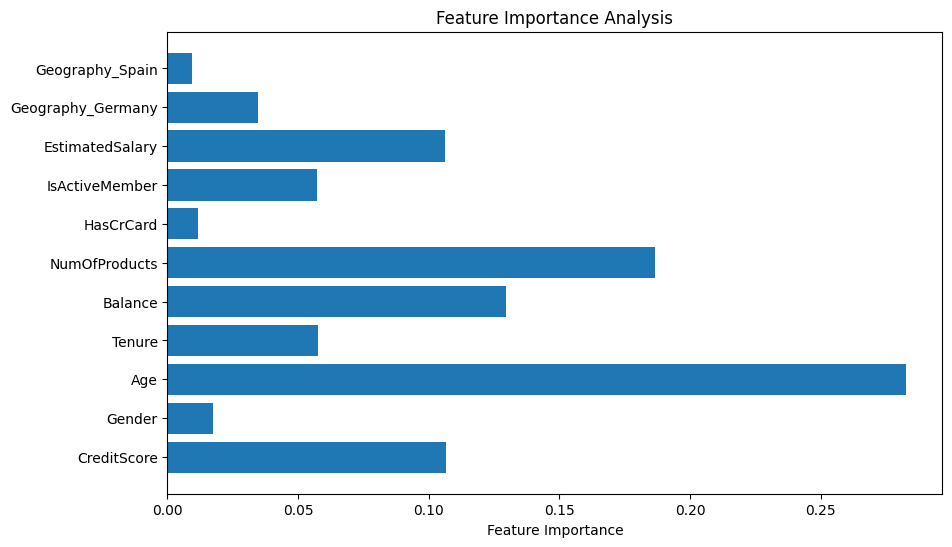

In [ ]:
# Feature importance from the best Random Forest model
import matplotlib.pyplot as plt

feature_importances = best_rf.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance Analysis")
plt.show()


In [ ]:
import joblib

# Save the best Random Forest model
joblib.dump(best_rf, 'optimized_random_forest_model.pkl')
print("Best model saved as 'optimized_random_forest_model.pkl'")


Best model saved as 'optimized_random_forest_model.pkl'


In [ ]:
# Load the saved model
loaded_model = joblib.load('optimized_random_forest_model.pkl')

# Example: Predict churn for new customers
import numpy as np

# Define a new customer example (replace these values with real inputs)
# Format: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
#          'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']
new_customer = np.array([[600, 1, 40, 3, 50000, 2, 1, 1, 100000, 0, 0]])

# Scale the input (using the same scaler used during training)
new_customer_scaled = scaler.transform(new_customer)

# Predict using the loaded model
churn_prediction = loaded_model.predict(new_customer_scaled)
churn_probability = loaded_model.predict_proba(new_customer_scaled)[:, 1]

# Output the prediction
print("Churn Prediction (1 = Churn, 0 = No Churn):", churn_prediction[0])
print("Churn Probability:", churn_probability[0])


Churn Prediction (1 = Churn, 0 = No Churn): 0
Churn Probability: 0.12361113003630263


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
